In [2]:
import pandas as pd
import numpy as np
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexTSIndicators,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = ForexDataLoad(file_path = '../data/xauaud.csv').data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_from_database
Data loaded successfully!
Shape: (38217, 5)



FOREX QUICK LOOK
 Available Fuctions 
1 display_info 
2 check_missing_values_and_duplicates 
3 plot_candlestick 
4 plot_time_series 
5 get_summary
DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    48 non-null     float64
 1   high    48 non-null     float64
 2   low     48 non-null     float64
 3   close   48 non-null     float64
 4   volume  48 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.2 KB
None

2. FIRST 3 ROWS:
                        open     high      low    close  volume
datetime                                                       
2025-09-03 19:00:00  5441.48  5452.88  5439.54  5452.58       0
2025-09-03 20:00:00  5452.56  5462.86  5447.80  5461.05       0
2025-09-03 21:00:00  5461.05  5465.36  5446.87  5454.38       0

3. LAST 3 ROWS:
        

<Figure size 1500x600 with 0 Axes>

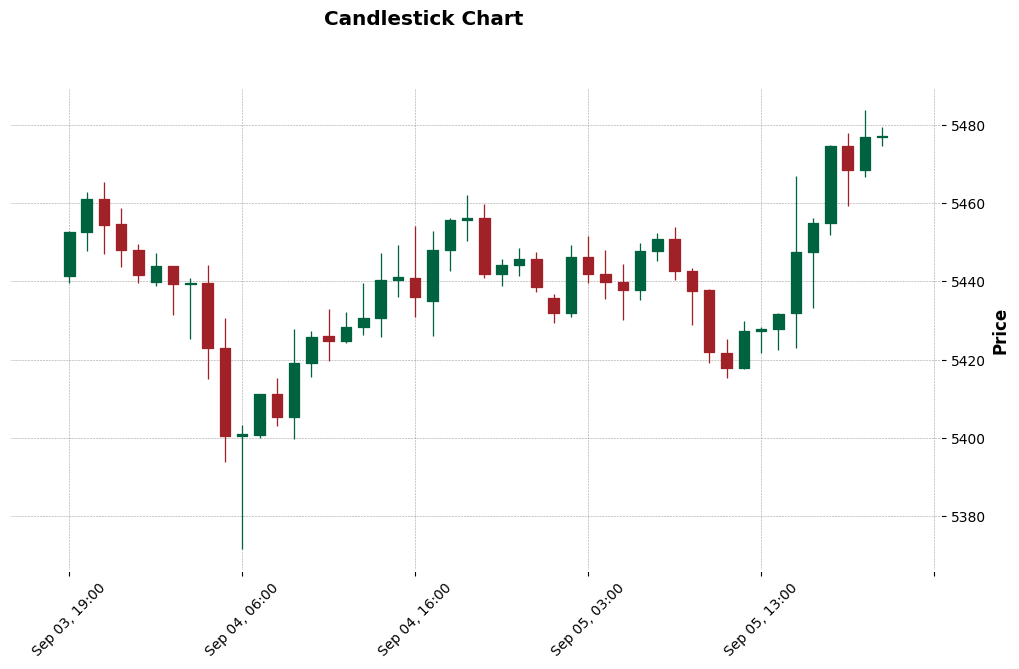

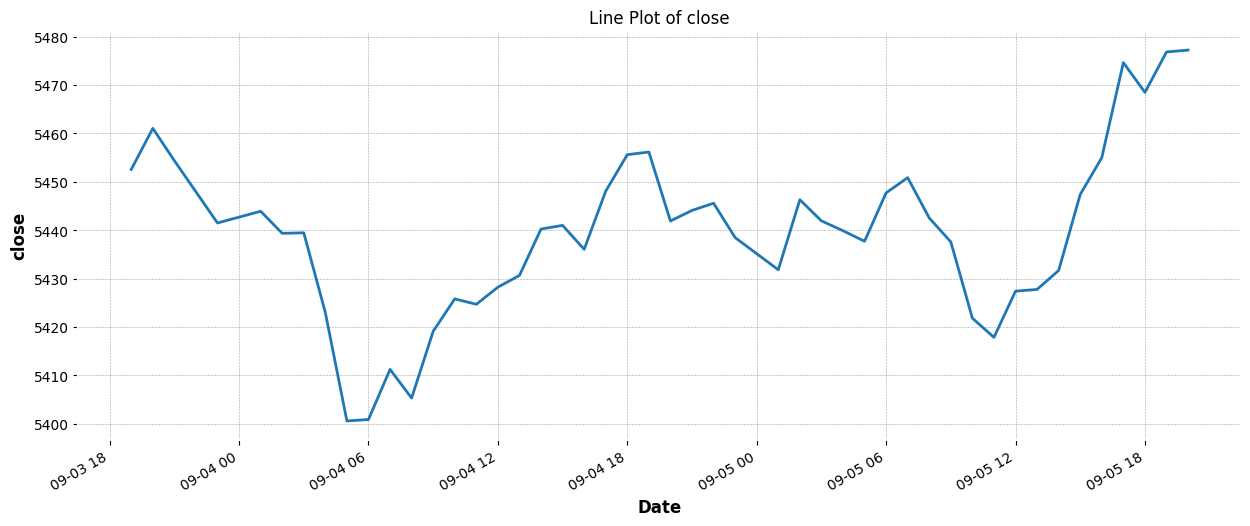

In [4]:
quick_look = ForexQuickLook( data = df, full_look = True, periods = 48)

In [5]:
cleaner = ForexDataClean(data = df, fast_clean = True)
df = cleaner.data

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

low: Found 766 outliers (383 low, 383 high)
Bounds: [1816.29450 - 5211.65900]
Original range: [1671.60000 - 5474.51000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

close: Found 76

In [6]:
df.tail(10)

,open,high,low,close,volume
datetime,,,,,
2025-09-05 11:00:00,5421.73,5425.39,5415.28,5417.88,0
2025-09-05 12:00:00,5417.88,5429.94,5417.73,5427.42,0
2025-09-05 13:00:00,5427.42,5428.38,5421.64,5427.78,0
2025-09-05 14:00:00,5427.78,5431.89,5422.54,5431.70,0
2025-09-05 15:00:00,5431.90,5467.02,5422.86,5447.40,0
2025-09-05 16:00:00,5447.51,5456.26,5433.22,5455.01,0
2025-09-05 17:00:00,5454.84,5474.80,5451.73,5474.64,0
2025-09-05 18:00:00,5474.54,5477.82,5459.37,5468.49,0
2025-09-05 19:00:00,5468.33,5483.78,5466.57,5476.84,0


In [7]:
trend = ForexTrendIndicators(data = df)

TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar 
6 generate_all_trend_indicators


In [8]:
trends_data, trend_params = trend.generate_all_trend_indicators()

Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   close                          38216 non-null  float64
 1   sma_10                         38207 non-null  float64
 2   sma_10_slope                   38206 non-null  float64
 3   sma_20                         38197 non-null  float64
 4   sma_20_slope                   38196 non-null  float64
 5   sma_50                         38167 non-null  float64
 6   sma_50_slope                   38166 non-null  float64
 7   sma_100                        38117 non-null  float64
 8   sma_100_slope                  38116 non-null  float64
 9   sma_200                        38017 non-null  float64
 10  sma_200_slope                  38016 non-null  float64
 11  ema_10                         38207 non-null  float64
 12  e

In [9]:
trend_params

{'sma_params': [10, 20, 50, 100, 200],
 'ema_params': [10, 20, 50, 100, 200],
 'macd_params': [12, 26, 9],
 'adx_params': [14, 21, 28],
 'sar_params': [0.02, 0.2]}

In [10]:
type(trend_params['adx_params'])

list

In [11]:
momentum = ForexMomentumIndicators(data = df)

MOMENTUM INDICATORS
 Available Fuctions 
1 add_rsi 
2 add_stochastic 
3 add_williams_r 
4 add_cci 
5 add_momentum 
6 generate_all_momentum_indicators


In [12]:
momentum_data, momentum_params = momentum.generate_all_momentum_indicators()

Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   close                38216 non-null  float64
 1   rsi_14               38202 non-null  float64
 2   rsi_14_slope         38201 non-null  float64
 3   rsi_21               38195 non-null  float64
 4   rsi_21_slope         38194 non-null  float64
 5   rsi_28               38188 non-null  float64
 6   rsi_28_slope         38187 non-null  float64
 7   stoch_slowk_3        38199 non-null  float64
 8   stoch_slowd_3        38199 non-null  float64
 9   stoch_slowk_3_slope  38198 non-null  float64
 10  stoch_slowd_3_slope  38198 non-null  float64
 11  williams_r_14        38203 non-null  float64
 12  williams_r_14_slope  38202 non-null  float64
 13  williams_r_21        38196 non-null  float64
 14  williams_r_21_slope  38195 non-null  floa

In [13]:
momentum_params

{'rsi_paramas': [14, 21, 28],
 'stochastic_params': [14, 3, 3],
 'williams_r_params': [14, 21, 28],
 'cci_params': [14, 21, 28],
 'momentum_params': [10, 14, 20]}

In [14]:
volatility = ForexVolatilityIndicators(data = df)

VOLATILITY INDICATORS
 Available Fuctions 
1 add_atr 
2 add_bollinger_bands 
3 add_keltner_channels 
4 add_standard_deviation  
5 generate_all_volatility_indicators


In [15]:
volatility_data, volatility_params = volatility.generate_all_volatility_indicators()

[14, 21, 28]
{'atr_params': [14, 21, 28]}
[10]
{'atr_params': [14, 21, 28], 'bb_params': [20, 2.0, 2.0], 'keltner_params': [20, 10, 2.0]}


Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   close                             38216 non-null  float64
 1   atr_14                            38202 non-null  float64
 2   atr_14_slope                      38201 non-null  float64
 3   atr_21                            38195 non-null  float64
 4   atr_21_slope                      38194 non-null  float64
 5   atr_28                            38188 non-null  float64
 6   atr_28_slope                      38187 non-null  float64
 7   bb_20_2.0_2.0_upper               38197 non-null  float64
 8   bb_20_2.0_2.0_middle              38197 non-null  float64
 9   bb_20_2.0_2.0_lower               38197 non-null  float64
 10  atr_10                            38206 non-null  float64
 11  atr_10_slope          

In [16]:
volatility_params

{'atr_params': [14, 21, 28],
 'bb_params': [20, 2.0, 2.0],
 'keltner_params': [20, 10, 2.0],
 'std_params': [20, 50, 100]}

In [17]:
volume = ForexVolumeIndicators(data = df)

VOLUME INDICATORS
 Available Fuctions 
1 add_obv 
2 add_volume_sma 
3 add_volume_roc 
4 generate_all_volume_indicators


In [18]:
volume_data, volume_params = volume.generate_all_volume_indicators()

Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   close                38216 non-null  float64
 1   obv                  38216 non-null  float64
 2   obv_ma_ratio         38197 non-null  float64
 3   volume_sma_5         38212 non-null  float64
 4   volume_sma_5_ratio   48 non-null     float64
 5   volume_sma_10        38207 non-null  float64
 6   volume_sma_10_ratio  48 non-null     float64
 7   volume_sma_20        38197 non-null  float64
 8   volume_sma_20_ratio  48 non-null     float64
 9   volume_sma_50        38167 non-null  float64
 10  volume_sma_50_ratio  48 non-null     float64
 11  volume_roc_5         48 non-null     float64
 12  volume_roc_10        48 non-null     float64
 13  volume_roc_14        48 non-null     float64
 14  volume_roc_21        48 non-null     floa

In [19]:
volume_params

{'obv_params': None,
 'volume_sma_params': [5, 10, 20, 50],
 'volume_roc_params': [5, 10, 14, 21]}